<a href="https://colab.research.google.com/github/fergarcat/Pildora-Tipos-de-graficas-en-el-Analisis-de-Datos/blob/main/Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Explicación paso a paso**

##1. **Cargar el dataset**

Se usa el dataset `'tips'` que contiene datos sobre cuentas de restaurantes, propinas, días de la semana, género del cliente, si fuma o no, etc.

Este dataset se carga usando **Seaborn**. Aún no estamos haciendo regresión, solo obteniendo los datos.

---

##2. **Preprocesar los datos**

Algunas columnas son **categóricas** (como `sex`, `smoker`, `day`, etc.). Estas columnas deben convertirse a números para que el modelo pueda trabajar con ellas. Se hace usando **variables dummy** (0 o 1).

---

##3. **Separar las variables**

Se separan las variables en dos grupos:

- `X`: todas las variables que vamos a usar para predecir (por ejemplo, `total_bill`, `size`, `sex_male`, etc.)
- `y`: la variable objetivo, que en este caso es `tip` (la propina)

---

##4. **Dividir en entrenamiento y prueba**

Se dividen los datos en dos conjuntos:

- **Entrenamiento**: para que el modelo aprenda
- **Prueba**: para verificar qué tan bien predice con datos nuevos

Normalmente se usa el **80% de los datos para entrenar** y el **20% para probar**.

---

##5. **Estandarizar los datos**

Esto asegura que todas las variables tengan la misma escala. Por ejemplo, si una variable está en miles y otra en decimales, el modelo podría dar más importancia a la más grande.

La **estandarización** transforma todas las variables para que tengan **media 0** y **desviación estándar 1**.

---

##6. **Aplicar LassoCV (con penalización)**

Aquí es donde empieza la **regresión Lasso** y donde se aplica la **penalización**.

Primero se define un **rango de valores posibles para alpha**, que es el parámetro que controla cuánto penaliza el modelo los coeficientes grandes.

Por ejemplo, se prueban muchos valores de alpha como: `0.0001`, `0.0003`, `0.001`, `0.01`, `0.1`, `1`, etc.

**¿Qué hace la penalización?**

Cuando el modelo entrena con cada valor de `alpha`, intenta minimizar una **función de costo** que incluye dos partes:

1. El error de predicción (por ejemplo, la diferencia entre lo que predice y la propina real)
2. La suma de los valores absolutos de los coeficientes multiplicada por `alpha`

Esto significa que el modelo no solo quiere predecir bien, sino también **mantener los coeficientes lo más cercanos posible a cero**. Esto ayuda a:

- Reducir el **sobreajuste**
- Eliminar variables poco importantes (al dejar sus coeficientes en cero)

**¿Cuándo se aplica la penalización?**

La penalización se aplica durante **cada intento de entrenamiento** del modelo, con **cada valor de alpha**. En cada una de esas pruebas, el modelo busca ajustar los coeficientes para lograr un equilibrio entre **precisión** y **simplicidad**.

Esto se repite en cada uno de los **5 pliegues** de la validación cruzada.

---

##7. **Elegir el mejor alpha**

Después de probar todos los valores de alpha en los 5 pliegues, **LassoCV elige automáticamente** el valor de alpha que dio el **mejor resultado promedio** en la validación cruzada.

Ese valor de alpha se usará como la penalización definitiva para entrenar el modelo final.

---

##8. **Ver los coeficientes del modelo**

Después del entrenamiento, podemos ver **qué coeficientes quedaron distintos de cero**. Los que son cero fueron **eliminados por la penalización**. Esto significa que el modelo considera que esas variables no aportan mucho a la predicción.

---

##9. **Evaluar el modelo**

Finalmente, se mide qué tan bien predice el modelo usando el **coeficiente de determinación R²**. Se puede calcular tanto para el conjunto de entrenamiento como para el de prueba.

Valores cercanos a **1** indican que el modelo explica bien los datos.

---

### **Resumen**

- La **penalización** se aplica durante el ajuste del modelo.
- Cada vez que el modelo prueba un valor de `alpha`, se aplica la penalización para forzar a los coeficientes a ser más pequeños.
- Con **validación cruzada**, `LassoCV` encuentra el `alpha` que logra el mejor balance entre buena predicción y simplicidad del modelo.
- El resultado es un modelo que solo usa las **variables más importantes**, y que tiene **menos riesgo de sobreajustarse** a los datos.


#**Ejemplo práctico**

Mejor alpha encontrado: 0.08685113737513521


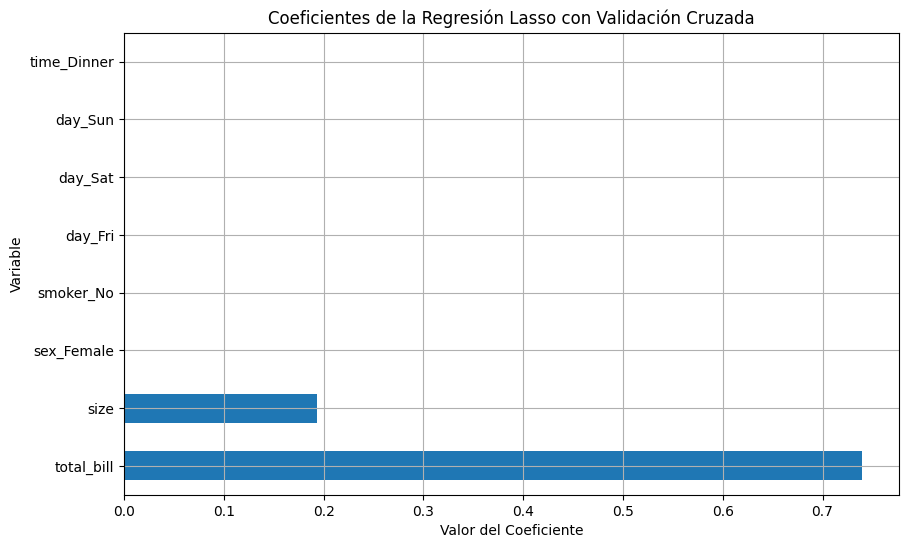

R^2 en entrenamiento: 0.45
R^2 en prueba: 0.51


In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Cargar el dataset 'tips'
df = sns.load_dataset('tips')

# 2. Preprocesamiento: convertir variables categóricas a dummies
df_encoded = pd.get_dummies(df, drop_first=True)

# 3. Separar X (features) e y (target)
X = df_encoded.drop('tip', axis=1)
y = df_encoded['tip']

# 4. Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Estandarizar las variables predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Validación cruzada para encontrar el mejor alpha con LassoCV
# Usamos una gama de valores de alpha en escala logarítmica
alphas = np.logspace(-4, 0, 50)
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

print("Mejor alpha encontrado:", lasso_cv.alpha_)

# 7. Mostrar los coeficientes del modelo
coef = pd.Series(lasso_cv.coef_, index=X.columns)

plt.figure(figsize=(10, 6))
coef.plot(kind='barh')
plt.title('Coeficientes de la Regresión Lasso con Validación Cruzada')
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Variable')
plt.grid(True)
plt.show()

# 8. Evaluación del modelo
print(f"R^2 en entrenamiento: {lasso_cv.score(X_train_scaled, y_train):.2f}")
print(f"R^2 en prueba: {lasso_cv.score(X_test_scaled, y_test):.2f}")
